# Patient No-Show Prediction: EDA

This notebook explores the **Medical Appointment No Shows dataset**.
We aim to understand:
- Class imbalance
- Feature distributions (Age, Gender, SMS reminders, etc.)
- Relationships between features and the no-show target

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [32]:
# Load dataset
data_path = "../data/raw/KaggleV2-May-2016.csv"
df = pd.read_csv(data_path)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
# Basic information
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)

Shape: (110527, 14)
Columns: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [34]:
# check null data
print("Missing values:\n", df.isnull().sum())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


Dataset seems to be good no missing values


## Target Distribution
Check distribution of `No-show` column to understand class imbalance.

No-show
No     88208
Yes    22319
Name: count, dtype: int64


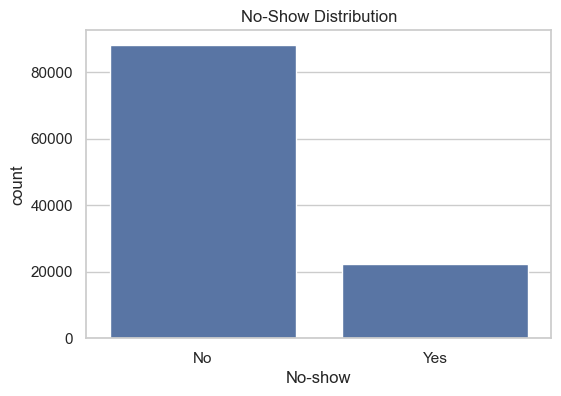

In [35]:
print(df['No-show'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='No-show', data=df)
plt.title("No-Show Distribution")
plt.show()

## Age Analysis
Explore age distribution and relationship with no-show.

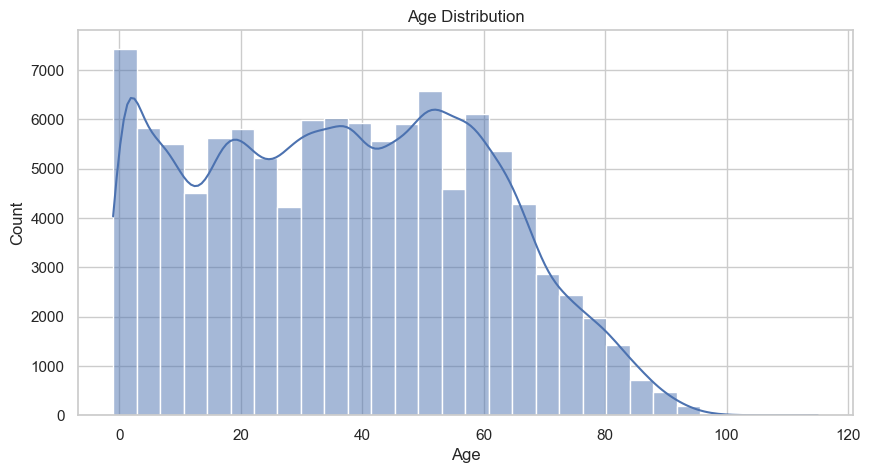

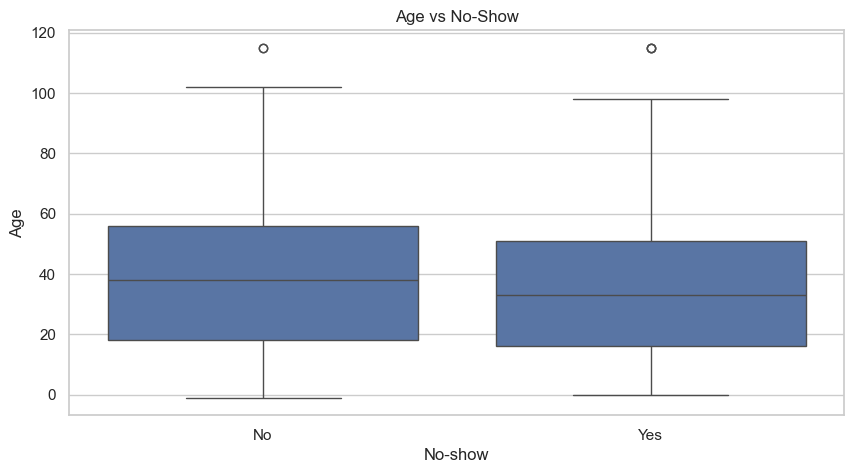

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='No-show', y='Age', data=df)
plt.title("Age vs No-Show")
plt.show()

## Gender Analysis
Compare no-show rates by gender.

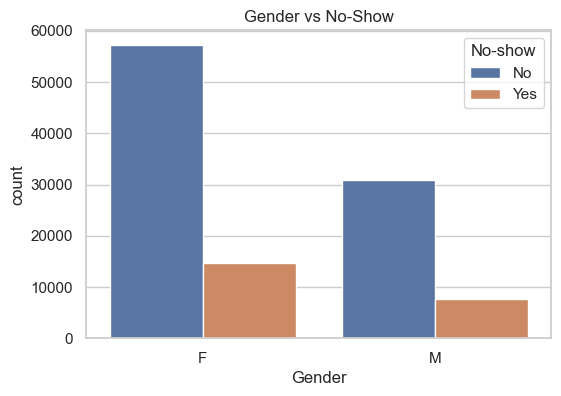

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title("Gender vs No-Show")
plt.show()

## SMS Reminder Analysis
Check if receiving an SMS affects no-show.

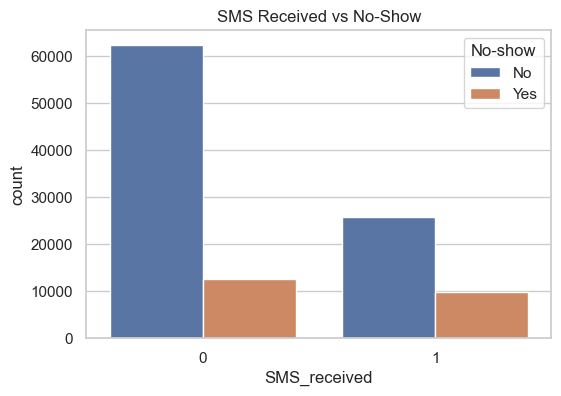

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title("SMS Received vs No-Show")
plt.show()

## Appointment Date Analysis
Convert dates and extract weekday to see if it affects no-show.

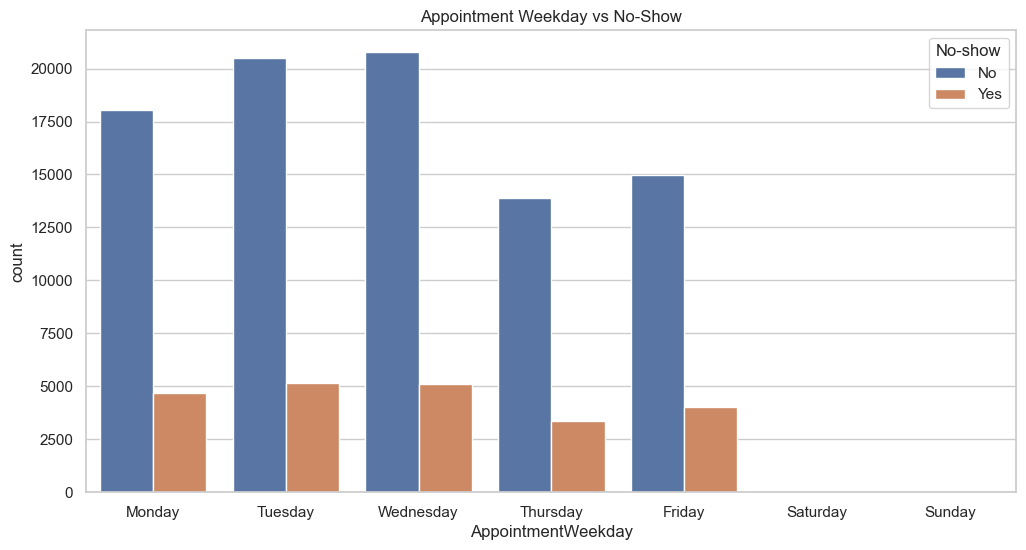

In [39]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentWeekday'] = df['AppointmentDay'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(x='AppointmentWeekday', hue='No-show', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Appointment Weekday vs No-Show")
plt.show()

## Days Between Scheduling & Appointment
Feature: DaysBetween = AppointmentDay - ScheduledDay.

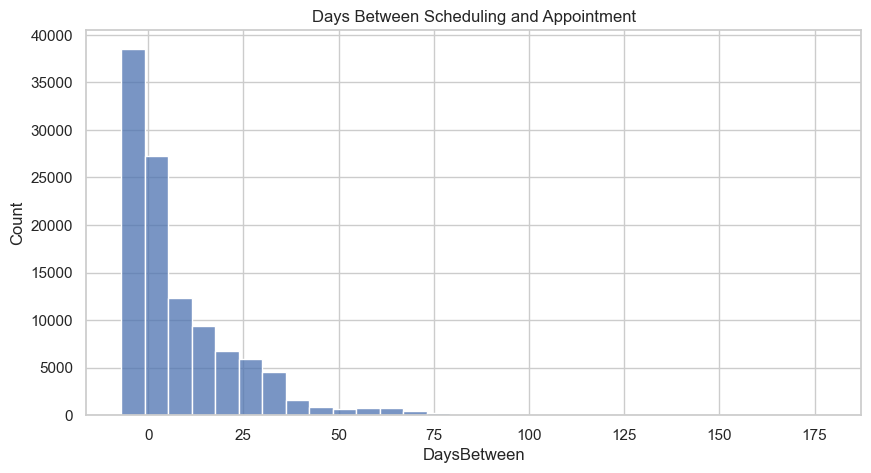

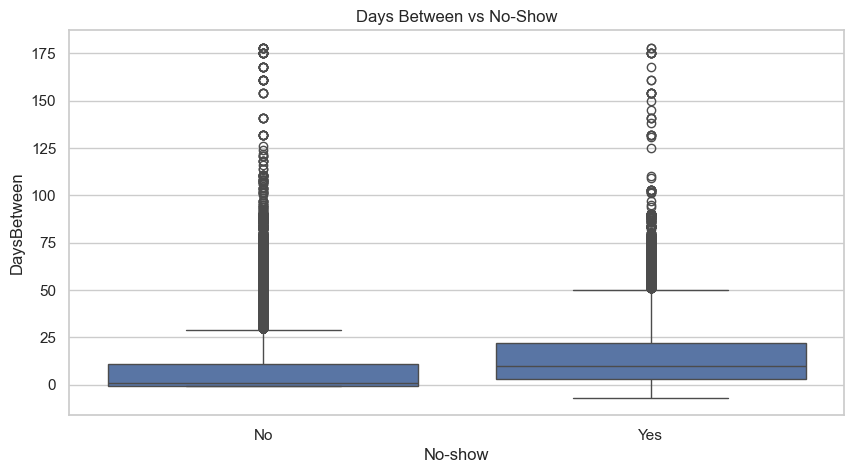

In [40]:
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

plt.figure(figsize=(10,5))
sns.histplot(df['DaysBetween'], bins=30)
plt.title("Days Between Scheduling and Appointment")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='No-show', y='DaysBetween', data=df)
plt.title("Days Between vs No-Show")
plt.show()

## Correlation Analysis
Convert categorical to numeric to compute correlation and explore relationships with target.

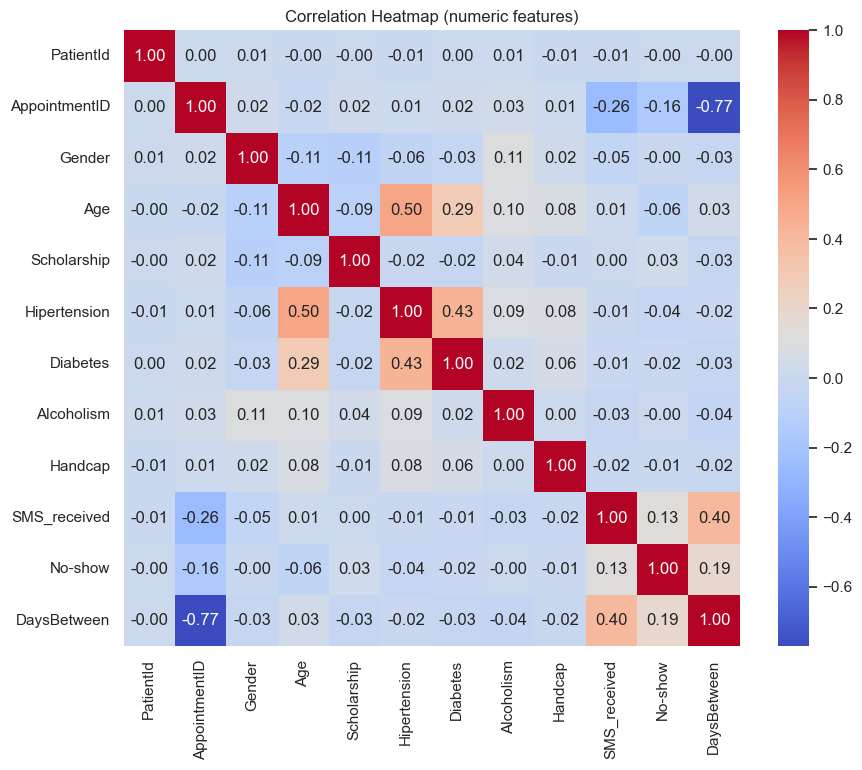

In [41]:
df_corr = df.copy()
df_corr['No-show'] = df_corr['No-show'].map({'No':0, 'Yes':1})
df_corr['Gender'] = df_corr['Gender'].map({'F':0, 'M':1})

# compute correlation on numeric columns only to avoid non-numeric dtypes (e.g. datetimes, objects)
corr = df_corr.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

In [42]:
# Summary of previous plots / analyses
# This cell prints concise, numeric summaries based on df (uses downstream cells' variables if present).

# ensure DaysBetween exists
if 'DaysBetween' not in df.columns:
    df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

total = len(df)
no_show_counts = df['No-show'].value_counts()
no_show_pct = no_show_counts.get('Yes', 0) / total * 100

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mean_no = df.loc[df['No-show']=='No', 'Age'].mean()
age_mean_yes = df.loc[df['No-show']=='Yes', 'Age'].mean()

gender_rates = (df.groupby('Gender')['No-show']
                  .apply(lambda s: (s=='Yes').mean()*100)
                  .to_dict())

sms_rates = (df.groupby('SMS_received')['No-show']
               .apply(lambda s: (s=='Yes').mean()*100)
               .rename({0:'No SMS',1:'SMS'})
               .to_dict())

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_rates = (df.groupby('AppointmentWeekday')['No-show']
                   .apply(lambda s: (s=='Yes').mean()*100)
                   .reindex(weekday_order)
                   .dropna()
                   .to_dict())

daysbetween_stats = df['DaysBetween'].describe()

print(f"Total records: {total}")
print(f"No-show rate: {no_show_pct:.1f}% (Yes: {no_show_counts.get('Yes',0)}, No: {no_show_counts.get('No',0)})")
print(f"Age — mean: {age_mean:.1f}, median: {age_median:.1f}; mean if showed: {age_mean_no:.1f}, if no-show: {age_mean_yes:.1f}")
print("No-show rate by gender: " + ", ".join([f"{g}: {pct:.1f}%" for g,pct in gender_rates.items()]))
print("No-show rate by SMS received: " + ", ".join([f"{k}: {v:.1f}%" for k,v in sms_rates.items()]))
print("No-show rate by appointment weekday: " + ", ".join([f"{d}: {weekday_rates[d]:.1f}%" for d in weekday_rates]))
print("DaysBetween (scheduling→appointment) stats:")
print(daysbetween_stats[['min','25%','50%','75%','max']].to_string())

Total records: 110527
No-show rate: 20.2% (Yes: 22319, No: 88208)
Age — mean: 37.1, median: 37.0; mean if showed: 37.8, if no-show: 34.3
No-show rate by gender: F: 20.3%, M: 20.0%
No-show rate by SMS received: No SMS: 16.7%, SMS: 27.6%
No-show rate by appointment weekday: Monday: 20.6%, Tuesday: 20.1%, Wednesday: 19.7%, Thursday: 19.4%, Friday: 21.2%, Saturday: 23.1%
DaysBetween (scheduling→appointment) stats:
min     -7.0
25%     -1.0
50%      3.0
75%     14.0
max    178.0


# Conclusions

- No-show rate is imbalanced
- Age and SMS reminders show some effect on no-show
- Weekday might play a role
- Days between scheduling & appointment could be predictive